# Basketball Statistics Analysis Using Python Web  Scraping

# Description
Web scraping, web harvesting, or web data extraction is data scraping used for extracting data from websites. This information is collected and then exported into a format that is more useful for the user.
In this assignment statistical data of some of the greatest basketball players are extracted from wikipedia. This data is then analysed using pandas and results have been plotted.



The list of players used here are  Michael Jordan, Kevin Garnett, and Lebron James. The datas are obtained from the wikipedia url for each player. 
The webscraping is done with Beautiful Soup, one of the Python's most popular libraries for pulling data out of HTML and XML files. 


In [1]:
# importing all the required modules.
# import the request library for making HTTP requests to get data from the web page.
# import Beautiful Soup for parsing through the HTML.
# import pandas for data analysis and manipulation.
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [2]:
def basketball_stats(link):
    # send a get request to the web page 
    response = requests.get(link)
    
    # creating a Beautiful soup object 'soup' with the html. With the soup object we can navigate and search through the html.
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # finding the table with class named 'wikitable sortable' and assigning it to 'table' object. 
    table = soup.find('table', class_='wikitable sortable')
    
    # below code gets the first <tr> tag and assign it to 'headers' object. This is used to create the column names of our dataframe. 
    headers = table.find('tr')
    
    # from the first <tr> tag, all the <th> tags are extracted and assigned to 'headers_name' object.
    # this information is used to get the column names for our dataframe.
    headers_name = headers.find_all('th')
    
    # dictionary 'data' is created to store the datas.
    data = {}
    keys = []
    
    # looping through the <th> tags.
    for i in headers_name:
        if i.find('abbr') == None:                       # for the one without <abbr> tag
            keys.append((i.text).rstrip())               # appends the data to the list 'keys'
            data[(i.text).rstrip()] = []                 # add the data as the key of the dictionary 'data'. Value of dictionary is an empty list
        else:                                            # for the one with <abbr> tag
            keys.append(i.find('abbr')['title'])         # appends the data within the attribute'title' in <abbr> to the list 'keys'
            data[i.find('abbr')['title']] = []           # add the data to dictionary 'data'. Value of dictionary is an an empty list

    all_rows = table.find_all('tr')[1:16]                # to find the <tr> tags and assigh it to 'all_rows' 
    for row in all_rows:                                 # looping through all the rows
        cells = row.find_all('td')                       # finding all the <td> tags 
        zip_data = zip(keys,cells)                       # zip the values to get zipped data
        for key, value in zip_data:                      # looping through zipped data and finding the value appropriate for the key in dictionary  
            data[key].append((value.text).rstrip())      # appending to the list in dictionary

    # return the dictionary 'data'
    return data
    
    

In [3]:
# all the urls of the players are put in a list.
links=['https://en.wikipedia.org/wiki/Michael_Jordan',
       'https://en.wikipedia.org/wiki/Kevin_Garnett',
      'https://en.wikipedia.org/wiki/LeBron_James']
     

In [4]:
# calling the function 'basketball_stats' and the data obtained is in the form of a dictionary.
# argument for the function is taken from the list of urls of all the players.
michael_jordan_dict = basketball_stats(links[0])
kevin_garnett_dict = basketball_stats(links[1])
lebron_james_dict = basketball_stats(links[2])


In [5]:
# dataframe for Michael Jordan is created with the help of Pandas Dataframe
mj_df = pd.DataFrame(michael_jordan_dict)
# removing the '*' symbol from the datas using rstrip and lstrip function
#'astype' function is used to cast the type of the entire data to another type. Here the string type is casted to float type for analysis purpose
for col in mj_df.iloc[:,2:]:
    mj_df[col] = mj_df[col].map(lambda x: str(x).lstrip('*').rstrip('*')).astype(float)
#mj_df.to_excel("Michael_Jordan.xls", index = False)


In [6]:
# dataframe for Kevin Garnett is created
kg_df = pd.DataFrame(kevin_garnett_dict)
for col in kg_df.iloc[:,2:]:
    kg_df[col] = kg_df[col].map(lambda x: str(x).lstrip('*').rstrip('*')).astype(float)


In [7]:
# dataframe for Lebron James is created
lj_df = pd.DataFrame(lebron_james_dict)
for col in lj_df.iloc[:,2:]:
    lj_df[col] = lj_df[col].map(lambda x: str(x).lstrip('*').rstrip('*')).astype(float)


In [8]:
# storing the player statistics in an excel file
mj_df.to_excel("Michael_Jordan.xls", index = False)

In [9]:
# display all the players dataframe by looping through all their dataframes
player_list = [mj_df, kg_df, lj_df]
names=['Michael Jordan','Kevin Garnett','Lebron James']
for i in range(3):
    print(names[i]) 
    display(player_list[i][player_list[i].columns])

Michael Jordan


,Year,Team,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,1984–85,Chicago,82.0,82.0,38.3,0.515,0.173,0.845,6.5,5.9,2.4,0.8,28.2
1,1985–86,Chicago,18.0,7.0,25.1,0.457,0.167,0.840,3.6,2.9,2.1,1.2,22.7
2,1986–87,Chicago,82.0,82.0,40.0,0.482,0.182,0.857,5.2,4.6,2.9,1.5,37.1
3,1987–88,Chicago,82.0,82.0,40.4,0.535,0.132,0.841,5.5,5.9,3.2,1.6,35.0
4,1988–89,Chicago,81.0,81.0,40.2,0.538,0.276,0.850,8.0,8.0,2.9,0.8,32.5
5,1989–90,Chicago,82.0,82.0,39.0,0.526,0.376,0.848,6.9,6.3,2.8,0.7,33.6
6,1990–91†,Chicago,82.0,82.0,37.0,0.539,0.312,0.851,6.0,5.5,2.7,1.0,31.5
7,1991–92†,Chicago,80.0,80.0,38.8,0.519,0.270,0.832,6.4,6.1,2.3,0.9,30.1
8,1992–93†,Chicago,78.0,78.0,39.3,0.495,0.352,0.837,6.7,5.5,2.8,0.8,32.6
9,1994–95,Chicago,17.0,17.0,39.3,0.411,0.500,0.801,6.9,5.3,1.8,0.8,26.9


Kevin Garnett


,Year,Team,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,1995–96,Minnesota,80.0,43.0,28.7,0.491,0.286,0.705,6.3,1.8,1.1,1.6,10.4
1,1996–97,Minnesota,77.0,77.0,38.9,0.499,0.286,0.754,8.0,3.1,1.4,2.1,17.0
2,1997–98,Minnesota,82.0,82.0,39.3,0.491,0.188,0.738,9.6,4.2,1.7,1.8,18.5
3,1998–99,Minnesota,47.0,47.0,37.9,0.460,0.286,0.704,10.4,4.3,1.7,1.8,20.8
4,1999–00,Minnesota,81.0,81.0,40.0,0.497,0.370,0.765,11.8,5.0,1.5,1.6,22.9
5,2000–01,Minnesota,81.0,81.0,39.5,0.477,0.288,0.764,11.4,5.0,1.4,1.8,22.0
6,2001–02,Minnesota,81.0,81.0,39.2,0.470,0.319,0.801,12.1,5.2,1.2,1.6,21.2
7,2002–03,Minnesota,82.0,82.0,40.5,0.502,0.282,0.751,13.4,6.0,1.4,1.6,23.0
8,2003–04,Minnesota,82.0,82.0,39.4,0.499,0.256,0.791,13.9,5.0,1.5,2.2,24.2
9,2004–05,Minnesota,82.0,82.0,38.1,0.502,0.240,0.811,13.5,5.7,1.5,1.4,22.2


Lebron James


,Year,Team,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,2003–04,Cleveland,79.0,79.0,39.5,0.417,0.290,0.754,5.5,5.9,1.6,0.7,20.9
1,2004–05,Cleveland,80.0,80.0,42.4,0.472,0.351,0.750,7.4,7.2,2.2,0.7,27.2
2,2005–06,Cleveland,79.0,79.0,42.5,0.480,0.335,0.738,7.0,6.6,1.6,0.8,31.4
3,2006–07,Cleveland,78.0,78.0,40.9,0.476,0.319,0.698,6.7,6.0,1.6,0.7,27.3
4,2007–08,Cleveland,75.0,74.0,40.4,0.484,0.315,0.712,7.9,7.2,1.8,1.1,30.0
5,2008–09,Cleveland,81.0,81.0,37.7,0.489,0.344,0.780,7.6,7.2,1.7,1.1,28.4
6,2009–10,Cleveland,76.0,76.0,39.0,0.503,0.333,0.767,7.3,8.6,1.6,1.0,29.7
7,2010–11,Miami,79.0,79.0,38.8,0.510,0.330,0.759,7.5,7.0,1.6,0.6,26.7
8,2011–12†,Miami,62.0,62.0,37.5,0.531,0.362,0.771,7.9,6.2,1.9,0.8,27.1
9,2012–13†,Miami,76.0,76.0,37.9,0.565,0.406,0.753,8.0,7.3,1.7,0.9,26.8


#  Analysing Data using Matplotlib library 

Analysis is done with the help of Matplotlib. Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

In [10]:
import matplotlib.pyplot as plt


c:\users\sanju bosco\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


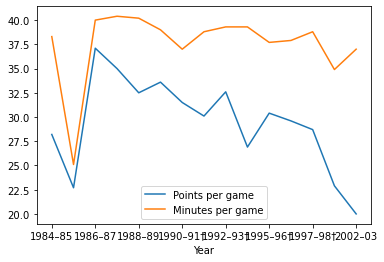

In [11]:
# line plot for multiple columns in dataframe. 
ax = plt.gca()
mj_df.plot(x ='Year', y='Points per game', kind = 'line', ax=ax)
mj_df.plot(x ='Year', y='Minutes per game', kind = 'line',ax=ax)
plt.show()

<AxesSubplot:xlabel='Year'>

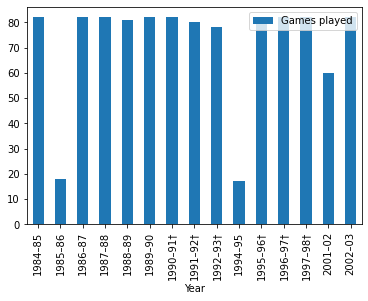

In [12]:
# plotting the column values as bar plot
mj_df.plot(kind='bar',x='Year',y='Games played')

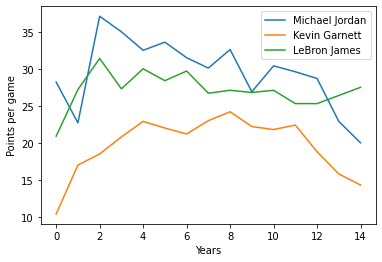

In [13]:
# using the function plt.plot() plot the Points per game for all the three players along with the name of player in the label parameter. Also xlabel, ylabel, and legend are added 
plt.plot(mj_df[['Points per game']], label = 'Michael Jordan')
plt.plot(kg_df[['Points per game']],label = 'Kevin Garnett')
plt.plot(lj_df[['Points per game']], label = 'LeBron James')
plt.xlabel('Years')
plt.ylabel('Points per game')
plt.legend()
plt.show()

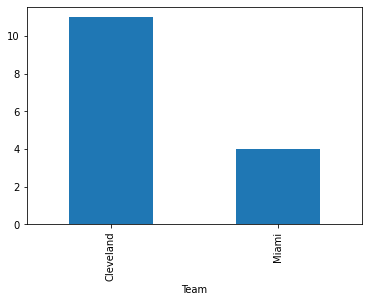

In [14]:
# split the data into groups 
lj_df.groupby('Team')['Year'].nunique().plot(kind='bar')
plt.show()

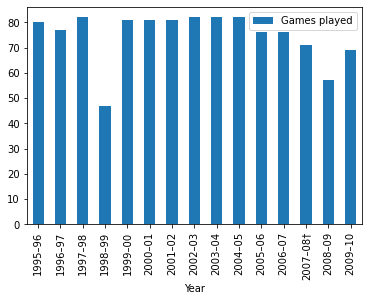

In [15]:
# saving the plot to a file name 'output.png'
kg_df.plot(kind='bar',x='Year',y='Games played')

plt.savefig('output.png')

In [1]:
pwd

'C:\\Users\\Sanju Bosco\\Desktop\\python files\\Python projects\\Bb_statistics\\notebook'

In [3]:
git init

SyntaxError: invalid syntax (<ipython-input-3-f188d5ac1197>, line 1)